In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
pd.set_option("display.max_columns",100)

In [11]:
## Proxy settings when using cntlm
http_proxy  = "http://localhost:3128"
https_proxy = "https://localhost:3128"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            }
proxyDict = None

In [4]:
mapping = {
    'Richmond': 'richmond',
    'West Coast': 'westcoast',
    'Sydney': 'swans',
    'Adelaide': 'adelaide',
    'Geelong': 'geelong',
    'Greater Western Sydney': 'gws',
    'Melbourne': 'melbourne',
    'Port Adelaide': 'padelaide',
    'Collingwood': 'collingwood',
    'Hawthorn': 'hawthorn',
    'Essendon': 'essendon',
    'Western Bulldogs': 'bullldogs',
    'St Kilda': 'stkilda',
    'North Melbourne': 'kangaroos',
    'Kangaroos' : 'kangaroos',
    'Fremantle': 'fremantle',
    'Brisbane Lions': 'brisbanel',
    'Gold Coast': 'goldcoast',
    'Carlton': 'carlton'
}

In [ ]:
from data_prep.team_history import History
team_df = History(mapping, proxyDict).generate_team_history()

In [ ]:
History(mapping, proxyDict).generate_game_data('training-all/', team_df)
History(mapping, proxyDict).generate_game_data_ha('training-hva/', team_df)

In [37]:
X_list = []
y_list = []

for i in range(1,16):
    X = np.concatenate([
        np.load('training-all/training-'+str(2019-i)+'.npy'),
        np.load('training-hva/training-'+str(2019-i)+'.npy')[:,1:] #remove the rnd column
                ], axis=1)
    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)
    
    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2789, 33)
(2789,)
Wins vs losses 0.577626389386877


In [162]:
from data_prep import feature_eng
training_cols = feature_eng.Features().training_cols()
pd.DataFrame(Features().div_cols(X_list[0]), columns=training_cols).head()

,Rnd,h_F_mean,h_F_std,h_A_mean,h_A_std,h_M_mean,h_M_std,h_W_sum,h_perc,a_F_mean,a_F_std,a_A_mean,a_A_std,a_M_mean,a_M_std,a_W_sum,a_perc,h_F_mean_hva,h_F_std_hva,h_A_mean_hva,h_A_std_hva,h_M_mean_hva,h_M_std_hva,h_W_sum_hva,h_perc_hva,a_F_mean_hva,a_F_std_hva,a_A_mean_hva,a_A_std_hva,a_M_mean_hva,a_M_std_hva,a_W_sum_hva,a_perc_hva,F_mean,F_std,A_mean,A_std,M_mean,M_std,W_sum,perc,F_mean_hva,F_std_hva,A_mean_hva,A_std_hva,M_mean_hva,M_std_hva,W_sum_hva,perc_hva
0,3.0,101.500000,0.000000,106.500000,0.000000,-5.000000,0.000000,1.0,0.953052,109.500000,0.000000,92.000000,0.000000,17.500000,0.000000,2.0,1.190217,121.00,0.000000,95.0,0.000000,26.00,0.000000,0.0,1.273684,118.000000,0.000000,117.000000,0.000000,1.000000,0.000000,0.0,1.008547,0.926941,1.025424,0.000000,0.000000,1.157609,0.811966,0.000000,0.000000,-0.285714,26.000000,0.000000,0.000000,0.500000,0.000000,0.800737,1.262890
1,4.0,101.666667,27.577164,100.666667,16.263456,1.000000,16.263456,2.0,1.009934,82.666667,5.656854,101.333333,4.949747,-18.666667,4.949747,0.0,0.815789,111.50,0.000000,92.0,0.000000,19.50,0.000000,2.0,1.211957,87.000000,0.000000,102.000000,0.000000,-15.000000,0.000000,0.0,0.852941,1.229839,1.281609,4.875000,0.000000,0.993421,0.901961,3.285714,0.000000,-0.053571,-1.300000,3.285714,0.000000,0.000000,0.000000,1.237983,1.420915
2,7.0,105.000000,14.275854,74.166667,39.274674,30.833333,39.274674,5.0,1.415730,83.666667,26.780590,82.166667,21.335417,1.500000,21.335417,3.0,1.018256,111.00,13.435029,67.0,4.242641,44.00,4.242641,3.0,1.656716,69.000000,25.455844,86.666667,29.698485,-17.666667,29.698485,1.0,0.796154,1.254980,1.608696,0.533067,0.527778,0.902637,0.773077,1.840821,0.142857,20.555556,-2.490566,1.840821,0.142857,1.666667,3.000000,1.390349,2.080900
3,10.0,100.555556,14.169888,75.555556,33.070272,25.000000,33.070272,7.0,1.330882,65.111111,19.455076,93.444444,11.624328,-28.333333,11.624328,2.0,0.696790,110.75,9.539392,58.5,43.405069,52.25,43.405069,4.0,1.893162,53.000000,7.000000,94.000000,7.023769,-41.000000,7.023769,0.0,0.563830,1.544369,2.089623,0.728339,1.362770,0.808561,0.622340,2.844919,6.179740,-0.882353,-1.274390,2.844919,6.179740,3.500000,0.000000,1.910021,3.357684
4,15.0,97.307692,18.372410,72.076923,32.980251,25.230769,32.980251,10.0,1.350053,88.307692,19.942341,70.230769,15.023214,18.076923,15.023214,10.0,1.257393,109.60,7.804913,62.2,39.306488,47.40,39.306488,5.0,1.762058,93.166667,17.672012,68.166667,13.935566,25.000000,13.935566,6.0,1.366748,1.101916,1.176386,0.921276,0.441654,1.026287,0.912469,2.195286,2.820588,1.395745,1.896000,2.195286,2.820588,1.000000,0.833333,1.073692,1.289234


In [109]:
from sklearn.metrics import make_scorer
def afl_loss(y_true,y_pred): 
    return -np.sum(1+np.log2(y_true*y_pred + (1-y_true)*(1-y_pred)))
scorer = make_scorer(afl_loss, greater_is_better=False, needs_proba=True)

In [144]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from data_prep.feature_eng import Features
from time import time
scores = []
best_models = []
bayesian_df = pd.DataFrame()

space={
        'n_estimators': Integer(100, 500),
        'max_depth': Integer(3, 5),
        'learning_rate': Real(10**-3, 0.1, "log-uniform"),
        'colsample_bytree': Real(0.1, 1.0, "uniform"),
        'subsample': Real(0.1, 1.0, "uniform"),
        'reg_lambda': Real(0.0, 1.0, "uniform"),
        'reg_alpha': Real(0.0, 1.0, "uniform"),
}

n_calls=100
cutoff_score=65

for j in range(len(X_list)):
    classifier = XGBClassifier(base_score=0.57574568288854, n_jobs=-1)
    y = y_list.copy()
    X = X_list.copy()
    y_test = y.pop(j)
    X_test = X.pop(j)
    y_train = np.concatenate(y, axis=0)
    X_train = np.concatenate(X, axis=0)

    X_train = Features().div_cols(X_train)
    X_test = Features().div_cols(X_test)

    start = time()
    opt = BayesSearchCV(classifier, search_spaces=space, scoring=scorer, cv=5, n_iter=n_calls, n_jobs=-1)
    # callback handler
    def on_step(iteration):
        score = opt.best_score_
        if score > cutoff_score:
            print('Interrupting!')
            return True

    opt.fit(X_train, y_train, callback=on_step)
    model = opt.best_estimator_ 
    print('Season',2018-j)
    print("Bayes CV search took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_calls))
    print("val. score:", opt.best_score_)
    print("test score:", opt.score(X_test, y_test))
    print(model)
    print("")
    best_models.append(model)
    scores.append(opt.score(X_test, y_test))

Interrupting!
Season 2018
Bayes CV search took 86.95 seconds for 100 candidates parameter settings.
val. score: 66.21462718977243
test score: 24.554828510408274
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.22952905282604238, gamma=0,
       learning_rate=0.008024991939619319, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=320, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1.0, reg_lambda=0.14994296215562034, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.1)

Interrupting!
Season 2017
Bayes CV search took 4.72 seconds for 100 candidates parameter settings.
val. score: 66.20446543412856
test score: 12.118672041501942
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.554930552502681, gamma=0,
       learning_rate=0.0066436041662496104, max_delta_step=0, max_depth=3,
   

Interrupting!
Season 2005
Bayes CV search took 11.31 seconds for 100 candidates parameter settings.
val. score: 66.85986509480585
test score: 16.186483059862564
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.39806024904997983, gamma=0,
       learning_rate=0.007599846049523707, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=259, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1638335295329413, reg_lambda=0.5390787182339127,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6030323927708772)

Interrupting!
Season 2004
Bayes CV search took 13.07 seconds for 100 candidates parameter settings.
val. score: 65.35277653745631
test score: 18.890485117127657
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.30559491913649683, gamma=0,
       learning_rate=0.0065901678753380

In [146]:
def averagingImp(models=[]):
    predictions = np.column_stack([
        model.feature_importances_ for model in models
    ])
    return np.mean(predictions, axis=1)

imp = pd.DataFrame(data=averagingImp(best_models),
             index=training_cols, 
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp.iloc[:10,:]

,importance
W_sum_hva,0.055276
perc_hva,0.050112
M_mean_hva,0.042506
M_mean,0.040665
F_mean,0.032111
M_std,0.030897
h_M_mean,0.029852
h_perc,0.025927
a_perc,0.025618
a_M_mean,0.025166


In [147]:
def averagingModels(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return np.mean(predictions, axis=1)

def stDevModels(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return np.std(predictions, axis=1)

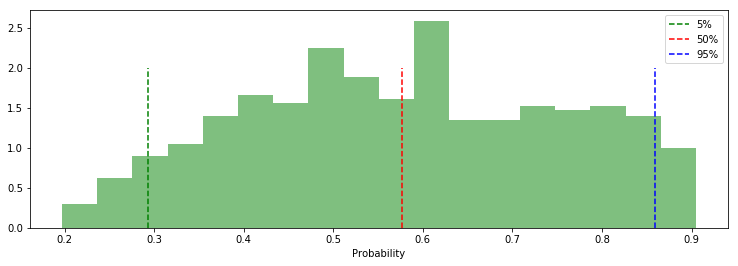

In [148]:
plt.figure(figsize=(12.5,4))
line_height = 2
data = averagingModels(X_train,best_models)
x = plt.hist(data, bins='auto', density=True, facecolor='green', alpha=0.5)

plt.vlines(np.percentile(data, 5), 0, line_height, linestyle="--", colors='green', label="5%")
plt.vlines(np.percentile(data, 50), 0, line_height, linestyle="--", colors='red', label="50%")
plt.vlines(np.percentile(data, 95), 0, line_height, linestyle="--", colors='blue', label="95%")
plt.xlabel('Probability')
plt.legend()

In [161]:
rows = []
for model in best_models:
    rows.append(model.get_params())
pd.DataFrame(rows)

,base_score,booster,colsample_bylevel,colsample_bytree,gamma,learning_rate,max_delta_step,max_depth,min_child_weight,missing,n_estimators,n_jobs,nthread,objective,random_state,reg_alpha,reg_lambda,scale_pos_weight,seed,silent,subsample
0,0.575746,gbtree,1,0.229529,0,0.008025,0,4,1,NaN,320,-1,None,binary:logistic,0,1.000000,0.149943,1,None,True,0.100000
1,0.575746,gbtree,1,0.554931,0,0.006644,0,3,1,NaN,369,-1,None,binary:logistic,0,0.859518,0.273013,1,None,True,0.973262
2,0.575746,gbtree,1,0.186376,0,0.010804,0,3,1,NaN,287,-1,None,binary:logistic,0,0.000000,0.000000,1,None,True,0.547090
3,0.575746,gbtree,1,0.125094,0,0.006180,0,4,1,NaN,483,-1,None,binary:logistic,0,0.677186,0.556744,1,None,True,0.458086
4,0.575746,gbtree,1,0.179157,0,0.005295,0,3,1,NaN,369,-1,None,binary:logistic,0,0.191628,0.773219,1,None,True,0.517403
5,0.575746,gbtree,1,0.299220,0,0.007431,0,3,1,NaN,369,-1,None,binary:logistic,0,0.000000,0.829901,1,None,True,0.101369
6,0.575746,gbtree,1,0.318388,0,0.004912,0,3,1,NaN,500,-1,None,binary:logistic,0,1.000000,0.000000,1,None,True,0.100000
7,0.575746,gbtree,1,0.340626,0,0.004773,0,3,1,NaN,483,-1,None,binary:logistic,0,0.000000,0.288811,1,None,True,0.100000
8,0.575746,gbtree,1,0.356185,0,0.006477,0,3,1,NaN,417,-1,None,binary:logistic,0,0.479147,0.657370,1,None,True,0.911263
9,0.575746,gbtree,1,0.100000,0,0.006831,0,3,1,NaN,500,-1,None,binary:logistic,0,0.350184,0.000000,1,None,True,0.881472


## Scoring

In [151]:
from data_prep.web_scraping import Scrape

games = []
start = 98
for i in range(start,start+9):
    games.append(Scrape(mapping, proxyDict).scrape_game(i))
games

/Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py:35: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 35 of the file /Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  r = requests.get(url, headers={'User-Agent': 'test'}, proxies=self.proxy)


[['West Coast', 'Melbourne'],
 ['Collingwood', 'St Kilda'],
 ['Brisbane Lions', 'Adelaide'],
 ['Geelong', 'Western Bulldogs'],
 ['Essendon', 'Fremantle'],
 ['North Melbourne', 'Sydney'],
 ['Port Adelaide', 'Gold Coast'],
 ['Richmond', 'Hawthorn'],
 ['Greater Western Sydney', 'Carlton']]

In [152]:
from data_prep.scoring import Scoring
scoring = Scoring(mapping, proxyDict).score_data(games)

/Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py:16: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 16 of the file /Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text, "html")


In [153]:
from data_prep.feature_eng import Features
scoring_enr = Features().div_cols(scoring)

In [157]:
arr = np.c_[ games, averagingModels(scoring_enr,best_models), stDevModels(scoring_enr,best_models) ] 
pd.DataFrame(arr,columns=['home','away','prob_avg', 'prob_std'])

,home,away,prob_avg,prob_std
0,West Coast,Melbourne,0.77801985,0.024330983
1,Collingwood,St Kilda,0.6935017,0.026173431
2,Brisbane Lions,Adelaide,0.5097246,0.016936135
3,Geelong,Western Bulldogs,0.71039027,0.017297562
4,Essendon,Fremantle,0.5424909,0.012114255
5,North Melbourne,Sydney,0.50362676,0.012269485
6,Port Adelaide,Gold Coast,0.6798676,0.021793908
7,Richmond,Hawthorn,0.5984039,0.021347562
8,Greater Western Sydney,Carlton,0.79436654,0.0129788965


## Save models

In [150]:
from joblib import dump
for i in range(len(best_models)):
    dump(best_models[i], 'models/model'+str(i)+'.joblib') 

## Load models

In [156]:
from joblib import load
best_models = []
for i in range(15):
    best_models.append(load('models/model'+str(i)+'.joblib'))